### Packages

we need to import the dataset from the Scikit-learn library, or else you can find structured datasets from platforms like Kaggle. But for now, we are using the Iris dataset prebuilt on Scikit-learn.

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris() #Loading the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Load DataFrame

Now we will be using Pandas' built-in function 'head()' to see the first few rows of our data frame.

In [ ]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

In [ ]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Here you can see that the iris data frame contains the length and width of sepals and petals including the target column which is the numerical representation of classes of Iris flowers that we need to classify (eg: Setosa(0), Versicolor(1),  Virginica(2) ).

Since there is no column of names of species in the data frame let's add one more column with names of different species corresponding to their numerical values. It really helps us to access the different classes using their names instead of numbers.


Since there is no column of names of species in the data frame let's add one more column with names of different species corresponding to their numerical values. It really helps us to access the different classes using their names instead of numbers.

In [ ]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

This code will create another column in the data frame with names of different species.

In [ ]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [ ]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Each number of classes has 50 instances together constituting 150 in total. You can also get some simple statistical information about the dataset by the "describe" method:

In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Plotting the dataset

Plotting a dataset is a great way to explore its distribution. Plotting the iris dataset can be done using matplotlib, a Python library for 2D plotting.

The following code will plot the iris dataset,

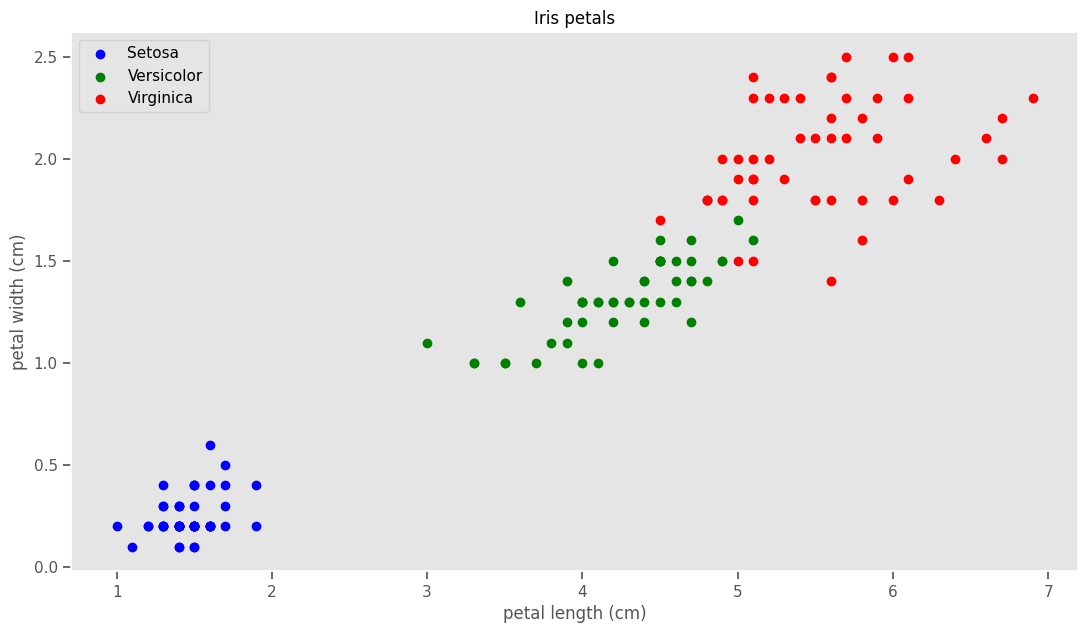

In [ ]:
import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

## Performing classification

When you look at the petal measurements of the three species of iris shown in the plot above, what do you see? It’s pretty obvious to us humans that Iris-virginica has larger petals than Iris-versicolor and Iris-setosa. But computers cannot understand like we do. It needs some algorithm to do so. In order to achieve such a task, we need to implement an algorithm that is able to classify the iris flowers into their corresponding classes.


Luckily we don't need to hardcode the algorithm for classification since there are already many algorithms available in the sci-kit learn package. We can simply choose any of them and use them. Here, I am going to use the Logistic Regression model. Now, after training our model on training data, we can predict petal measurements on testing data. And that's it!

Before importing our Logistic model we need to convert our pandas' data frame into NumPy arrays. It is because we cannot apply the pandas data frame to an algorithm directly. Also, we can use the train_test_split function in sklearn in order to split the dataset into train and test,

Logistic Regression could be one of the best models for solving problems that require categorizing different instances into groups of similar features, which we basically call classification problems. Logistic Regression as we know is a binary classifier that deals with binary classes, for instance, it can be used to predict whether a person has a risk of heart disease or not. But classification will not only end up in two classes. Suppose  In some cases, we need more than two classes, in such a case we can extend the binary Logistic Regression to multiclass known as a Multinomial Logistic Regression or Softmax Regression.

In [ ]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

Alright! now we have all the stuff necessary for the Logistic Model, so let's import and train it.

Logistic regression is a type of statistical model used for  classification tasks, where the goal is to predict the possible outcomes based on input features. It is commonly used in machine learning and statistics to solve problems like spam detection, medical diagnosis, credit risk analysis, and more.

The main idea behind logistic regression is to model the relationship between the input features (predictors or independent variables) and the binary output (dependent variable or target) using the logistic function, also known as the sigmoid function. The sigmoid function maps any real-valued number to a value between 0 and 1.

## What is Multinomial Logistic Regression?

Training multiple binary classifiers and combining them together for multiclass classification makes sense, but there is another better way of doing multiclass classification which is by generalizing the Logistic Regression to support multiple classes directly known as Multinomial Logistic Regression or Softmax Regression.

In binary Logistic Regression, we deal with two classes, ie, y ∈ {0, 1} which we used to predict whether a person has a risk of heart disease(1) or not (0). In the case of Multinomial Logistic Regression, it handles up to K classes, ie, y ∈ {1, 2,3, ..., K}.

The softmax function is used to generalize the Logistic Regression for supporting multiple classes. We provide an input vector along with the coefficients to the softmax function and it gives an output vector of K classes with probabilities of which class the data belongs to. The class that has the highest probability will be the correct class and is represented as 1 and the remaining classes as 0. The vector representation of such a class is known as a one-hot vector.

We can represent the probability of getting the correct result mathematically as p(y = 1|x), the probability of getting a correct class for a given input, ie, the probability of y = 1 for a given x.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
training_prediction = log_reg.predict(X_train)
training_prediction


array([1., 2., 1., 0., 1., 2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 1., 2.,
       2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0.,
       1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1.,
       2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 0., 1., 1., 0., 1., 2.])

In [ ]:
test_prediction = log_reg.predict(X_test)
test_prediction

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

## Performance Measures

Performance measures are used to evaluate the effectiveness of classifiers on different datasets with different characteristics. For classification problems, there are three main measures for evaluating the model, the precision(the accuracy of positive predictions or the number of most relevant values from retrieved values.), Recall(ratio of positive instances that are truly detected by the classifier), and confusion matrix.

In [ ]:
# Performance in training
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        21
         1.0      0.923     0.889     0.906        27
         2.0      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75

[[21  0  0]
 [ 0 24  3]
 [ 0  2 25]]


In [ ]:
# Performance in testing
print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_test, test_prediction))

Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75

[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]


In [ ]:
# Accuracy
metrics.accuracy_score(y_test, test_prediction)*100

100.0